In [136]:
import numpy as pd
import pandas as pd 

In [137]:
df =pd.read_csv('placement.csv', index_col=0)

In [138]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.1 KB


In [140]:
df.iloc[:,1:]

,iq,placement
0,123.0,1
1,106.0,0
2,121.0,0
3,132.0,1
4,142.0,0
...,...,...
95,200.0,0
96,42.0,0
97,182.0,1
98,103.0,1


In [141]:
import matplotlib.pyplot as plt

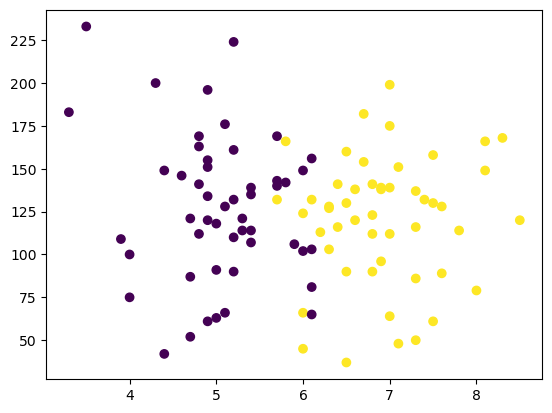

In [142]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [143]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [144]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [145]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [146]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [147]:
x_train

,cgpa,iq
44,7.5,61.0
51,4.8,141.0
0,6.8,123.0
10,6.0,45.0
38,6.5,160.0
...,...,...
26,7.0,199.0
93,6.8,112.0
37,8.1,149.0
78,6.1,81.0


In [148]:
y_train


44    1
51    0
0     1
10    1
38    1
     ..
26    1
93    1
37    1
78    0
15    0
Name: placement, Length: 90, dtype: int64

In [149]:
x_test

,cgpa,iq
98,6.3,103.0
9,5.1,66.0
42,7.6,89.0
61,7.3,137.0
4,5.8,142.0
54,6.4,141.0
72,7.3,116.0
24,4.7,121.0
92,5.2,110.0
83,7.5,130.0


In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
scaler =StandardScaler()

In [152]:
x_train =scaler.fit_transform(x_train)

In [153]:
x_train

array([[ 1.3516013 , -1.54543976],
       [-1.00957135,  0.40225257],
       [ 0.73944543, -0.03597821],
       [ 0.03983872, -1.93497822],
       [ 0.47709291,  0.86482949],
       [ 0.03983872, -1.42370899],
       [ 1.26415046,  0.18313718],
       [ 2.05120801,  1.05959873],
       [-1.09702219, -1.76455514],
       [ 1.3516013 ,  0.81613719],
       [-0.2225138 ,  1.08394488],
       [-0.48486632,  0.35356026],
       [-0.65976799,  0.88917565],
       [ 0.12728955,  0.76744488],
       [-1.3593747 , -2.00801668],
       [-1.3593747 ,  0.5970218 ],
       [-0.48486632, -0.25509359],
       [ 0.03983872,  0.5970218 ],
       [ 0.12728955, -1.44805514],
       [-1.09702219, -0.91243975],
       [ 0.38964207, -0.20640128],
       [ 0.03983872, -0.54724744],
       [-0.83466967, -0.81505514],
       [-0.2225138 ,  0.18313718],
       [ 0.12728955, -0.52290129],
       [-0.65976799,  2.42298335],
       [-2.32133393,  1.42479104],
       [ 0.47709291, -0.83940129],
       [-0.83466967,

In [154]:
x_test = scaler.transform(x_test)

In [155]:
x_test

array([[ 0.30219123, -0.52290129],
       [-0.74721883, -1.42370899],
       [ 1.43905214, -0.86374744],
       [ 1.17669962,  0.30486795],
       [-0.13506296,  0.42659872],
       [ 0.38964207,  0.40225257],
       [ 1.17669962, -0.20640128],
       [-1.09702219, -0.08467051],
       [-0.65976799, -0.35247821],
       [ 1.3516013 ,  0.13444487]])

In [156]:
from sklearn.linear_model import LogisticRegression

In [157]:
clf =LogisticRegression()

In [158]:
clf.fit(x_train,y_train)

LogisticRegression()

In [159]:
y_pred =clf.predict(x_test)

In [160]:
y_test

98    1
9     0
42    1
61    1
4     0
54    1
72    1
24    0
92    0
83    1
Name: placement, dtype: int64

In [161]:
from sklearn.metrics import accuracy_score

In [162]:
accuracy_score(y_test,y_pred)

1.0

In [163]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

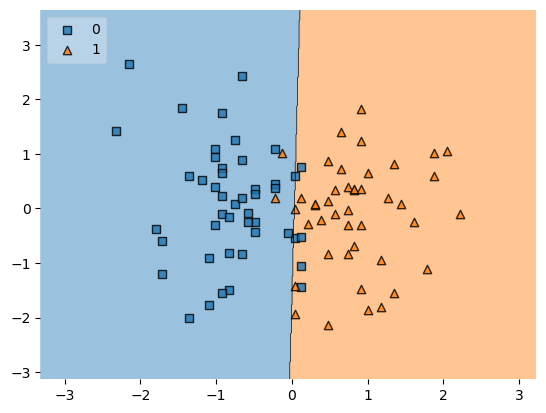

In [164]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [165]:
import pickle

In [166]:
pickle.dump(clf,open('model2.pkl','wb'))